In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-bowl-2018/stage1_test.zip
/kaggle/input/data-science-bowl-2018/stage1_sample_submission.csv.zip
/kaggle/input/data-science-bowl-2018/stage2_sample_submission_final.csv.zip
/kaggle/input/data-science-bowl-2018/stage1_train.zip
/kaggle/input/data-science-bowl-2018/stage1_train_labels.csv.zip
/kaggle/input/data-science-bowl-2018/stage1_solution.csv.zip
/kaggle/input/data-science-bowl-2018/stage2_test_final.zip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [3]:
import zipfile

with zipfile.ZipFile("/kaggle/input/data-science-bowl-2018/stage1_train.zip","r") as zip_ref:
    
    zip_ref.extractall("stage1_train_extract")

In [4]:
class CustomDataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self,ids,path,image_size=128,batch_size=8,shuffle=True):
        self.path = path
        self.ids = ids
        self.batch_size = batch_size
        self.image_size=image_size
        self.shuffle = shuffle
        self.on_epoch_end
        
    def __load__(self,id_name):
        image_path = os.path.join(self.path,id_name,"images",id_name)+".png"
        mask_path = os.path.join(self.path,id_name,"masks/")
        all_masks = os.listdir(mask_path)
        
        #Reading image
        image = cv2.imread(image_path,1)
        image = cv2.resize(image,(self.image_size,self.image_size))
        
        mask = np.zeros((self.image_size,self.image_size,1))
        
        for name in all_masks:
            _mask_path = mask_path + name
            _mask_image = cv2.imread(_mask_path,-1)
            _mask_image = cv2.resize(_mask_image,(self.image_size,self.image_size))
            _mask_image = np.expand_dims(_mask_image,axis=-1)
            mask = np.maximum(mask,_mask_image)
            
        image = image/255.0
        mask = mask/255.0
        
        return image,mask
    
    def __getitem__(self,index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
        
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask

    def __len__():
        return int(np.ceil(len(self.ids)/float(self.batch_size)))
    
    def on_epoch_end():
        pass

In [5]:
image_size = 128
train_path = "/kaggle/working/stage1_train_extract"
epochs = 5
batch_size = 8

## Training Ids
train_ids = next(os.walk(train_path))[1]

## Validation Data Size
val_data_size = 10

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

In [6]:
gen = CustomDataGenerator(train_ids,train_path, batch_size=batch_size, image_size=image_size)
X, y = gen.__getitem__(0)
print(X.shape, y.shape)

(8, 128, 128, 3) (8, 128, 128, 1)


In [7]:
next(os.walk(train_path))[1]

['40946065f7e4b6038599fbfd419f2a67e7635b6f89db3ed6c0d67c8801521af1',
 '3bf7873f11823f4b64422f49c8248dd95c0d01f9ae9075ae3d233bbb21a3d875',
 '1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72',
 'f4c4db3df4ff0de90f44b027fc2e28c16bf7e5c75ea75b0a9762bbb7ac86e7a3',
 '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13',
 'c169a7782a69ea2f38f64d2739de189e88adbcfd4a829721def8c89ecabe8b71',
 '76faaed50ed6ea6814ac36199964b86fb09ba7f41a6f213bceaa80d625adc2e1',
 '6bd18a218d25247dc456aed124c066a6397fb93086e860e4d04014bfa9c9555d',
 'f6cb37ebf29c225284c8415962f7287abe7007fae8fe3d8a3899b608b832d7d5',
 '602f267432e7a573e1092f1cf48135c82d0fbc8722bc028b9330ec801a40bb18',
 'bb61fc17daf8bdd4e16fdcf50137a8d7762bec486ede9249d92e511fcb693676',
 'a08166d91d2cca263d2dd52764dc25c9c582b7a5ece2b802749fa4be33187c49',
 'e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0',
 'dbbfe08a52688d0ac8de9161cbb17cb201e3991aacab8ab8a77fe0e203a69481',
 '5ba4facefc949c920d7054813a3e846b

In [8]:
import random
random.randint(0,len(X)-1)

4

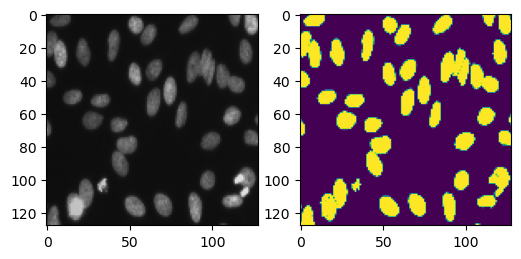

In [9]:
# fig = plt.figure()
num = random.randint(0,len(X))
fig,ax = plt.subplots(1,2,figsize=(6,3))

ax[0].imshow(X[num])
ax[1].imshow(y[num])
plt.show()

Convolution Blocks

In [68]:
def down_block(x,filters,kernel_size=3,padding="same"):
    conv1 = layers.Conv2D(filters,kernel_size=kernel_size,padding=padding,activation="relu")(x)
    conv2 = layers.Conv2D(filters,kernel_size=kernel_size,padding=padding,activation="relu")(conv1)
    pool_layer = layers.MaxPool2D(pool_size=(2,2),strides=2)(conv2)
    
    return conv2,pool_layer

def up_block(x,skip,filters,kernel_size=3,padding="same",strides=2):
    upsample_layer = layers.UpSampling2D((2,2))(x)
    concat = layers.Concatenate()([upsample_layer,skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
#     conv3 = layers.Conv2DTranspose(filters,kernel_size=3,strides=(2,2),padding=padding)(c)
#     pool = layers.MaxPooling2D()(conv3)
#     conv4 = layers.Conv2D(filters,kernel_size=kernel_size,activation="relu")(pool)
    conv5 = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    
    return conv5

# def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
#     us = keras.layers.UpSampling2D((2, 2))(x)
#     concat = keras.layers.Concatenate()([us, skip])
#     c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
#     c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
#     return c

def bottleneck(x,filters,kernel_size=3,strides=1,padding="same"):
    conv6 = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    conv7 = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(conv6)
    
    return conv7

In [35]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [69]:
def UNet():
    
    f = [16,32,64,128,256]
    inputs = keras.Input(shape=(image_size,image_size,3))
    
    c1,p1 = down_block(inputs,f[0])
    c2,p2 = down_block(p1,f[1])
    c3,p3 = down_block(p2,f[2])
    c4,p4 = down_block(p3,f[3])
    
    bn = bottleneck(p4,f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [70]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 8, 8, 128), (None, 32, 32, 64)]